View Classes provide node, edge and degree "views" of a graph.
Views for nodes, edges and degree are provided for all base graph classes.
A view means a read-only object that is quick to create, automatically
updated when the graph changes, and provides basic access like `n in V`,
`for n in V`, `V[n]` and sometimes set operations.
The views are read-only iterable containers that are updated as the
graph is updated. As with dicts, the graph should not be updated
while iterating through the view. Views can be iterated multiple times.
Edge and Node views also allow data attribute lookup.
The resulting attribute dict is writable as `G.edges[3, 4]['color']='red'`
Degree views allow lookup of degree values for single nodes.
Weighted degree is supported with the `weight` argument.
NodeView
========
    `V = G.nodes` (or `V = G.nodes()`) allows `len(V)`, `n in V`, set
    operations e.g. "G.nodes & H.nodes", and `dd = G.nodes[n]`, where
    `dd` is the node data dict. Iteration is over the nodes by default.
NodeDataView
============
    To iterate over (node, data) pairs, use arguments to `G.nodes()`
    to create a DataView e.g. `DV = G.nodes(data='color', default='red')`.
    The DataView iterates as `for n, color in DV` and allows
    `(n, 'red') in DV`. Using `DV = G.nodes(data=True)`, the DataViews
    use the full datadict in writeable form also allowing contain testing as
    `(n, {'color': 'red'}) in VD`. DataViews allow set operations when
    data attributes are hashable.
DegreeView
==========
    `V = G.degree` allows iteration over (node, degree) pairs as well
    as lookup: `deg=V[n]`. There are many flavors of DegreeView
    for In/Out/Directed/Multi. For Directed Graphs, `G.degree`
    counts both in and out going edges. `G.out_degree` and
    `G.in_degree` count only specific directions.
    Weighted degree using edge data attributes is provide via
    `V = G.degree(weight='attr_name')` where any string with the
    attribute name can be used. `weight=None` is the default.
    No set operations are implemented for degrees, use NodeView.
    The argument `nbunch` restricts iteration to nodes in nbunch.
    The DegreeView can still lookup any node even if nbunch is specified.
EdgeView
========
    `V = G.edges` or `V = G.edges()` allows iteration over edges as well as
    `e in V`, set operations and edge data lookup `dd = G.edges[2, 3]`.
    Iteration is over 2-tuples `(u, v)` for Graph/DiGraph. For multigraphs
    edges 3-tuples `(u, v, key)` are the default but 2-tuples can be obtained
    via `V = G.edges(keys=False)`.
    Set operations for directed graphs treat the edges as a set of 2-tuples.
    For undirected graphs, 2-tuples are not a unique representation of edges.
    So long as the set being compared to contains unique representations
    of its edges, the set operations will act as expected. If the other
    set contains both `(0, 1)` and `(1, 0)` however, the result of set
    operations may contain both representations of the same edge.
EdgeDataView
============
    Edge data can be reported using an EdgeDataView typically created
    by calling an EdgeView: `DV = G.edges(data='weight', default=1)`.
    The EdgeDataView allows iteration over edge tuples, membership checking
    but no set operations.
    Iteration depends on `data` and `default` and for multigraph `keys`
    If `data is False` (the default) then iterate over 2-tuples `(u, v)`.
    If `data is True` iterate over 3-tuples `(u, v, datadict)`.
    Otherwise iterate over `(u, v, datadict.get(data, default))`.
    For Multigraphs, if `keys is True`, replace `u, v` with `u, v, key`
    to create 3-tuples and 4-tuples.
    The argument `nbunch` restricts edges to those incident to nodes in nbunch.
"""

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
from networkx.readwrite import json_graph
import json

In [4]:
graphJSON = json.loads(open('jsonGraph.json').read())

In [5]:
H = json_graph.node_link_graph(graphJSON, multigraph=False)

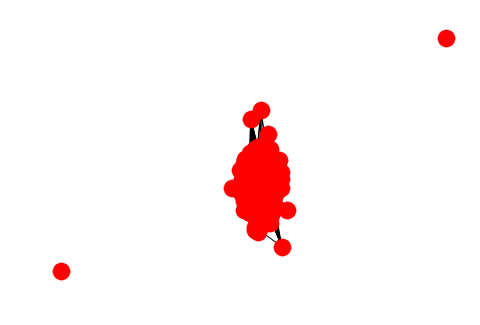

In [131]:
nx.draw(H)

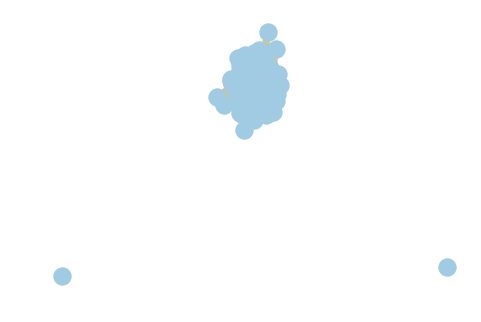

In [8]:
pos = nx.spring_layout(H)
colors = range(20)
nx.draw(H, pos, node_color='#A0CBE2', edge_color='#D4C490',
        width=4, edge_cmap=plt.cm.Blues, with_labels=False)
plt.show()

In [8]:
pr = nx.pagerank(H, alpha=0.15, weight='weight')

KeyboardInterrupt: 

In [10]:
for key, value in pr.items():
    H.nodes[key]['pagerank'] = value

In [11]:
weighted_degree = H.degree(weight='weight')

In [12]:
unweighted_degree = H.degree()

In [13]:
for key, value in unweighted_degree:
    H.nodes[key]['unweighted_degree'] = value

In [14]:
for key, value in weighted_degree:
    H.nodes[key]['weighted_degree'] = value

In [15]:
maxi = 0
maxi_key = ''
for key, value in weighted_degree:
    if(value>maxi):
        maxi = value
        maxi_key = key
        
print(maxi_key, maxi)

4JNXUYY8wbaaDmk3BPzlWw 81.11498999999999


In [1]:
# write back the graph to JSON

savedData = nx.readwrite.json_graph.node_link_data(H)
with open('jsonEnrichedGraph.json', 'w') as outfile:
    json.dump(savedData, outfile)

NameError: name 'nx' is not defined

In [10]:
for key in H.nodes():
    print(H[key])

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

